In [206]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
df = pd.read_csv('/Users/elifseven/Desktop/PytorchUdemy/NYCTaxiFares.csv')

In [208]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [209]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [210]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [211]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [213]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km'],
      dtype='object')

In [214]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [216]:
my_time = df['pickup_datetime'][0]

In [217]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [218]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)

In [219]:
df['Hour'] = df['EDTdate'].dt.hour

In [220]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [221]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [222]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [223]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [224]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [225]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [226]:
y_col = ['fare_amount']

In [227]:
df.dtypes 

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [228]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [229]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [230]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [231]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [232]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [233]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [234]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [235]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [236]:
cats = np.stack([hr,ampm,wkdy], axis = 1)

In [237]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [238]:
cats = torch.tensor(cats, dtype = torch.int64)

In [239]:
conts = np.stack([df[col].values for col in cont_cols], axis =1)

In [240]:
conts  #(conts: continous values)

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [241]:
conts = torch.tensor(conts, dtype = torch.float)

In [242]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [243]:
torch.tensor(df[y_col].values, dtype = torch.float).reshape(-1,1)

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [277]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values).flatten()

y[:5]

tensor([ 6.5000,  6.9000, 10.1000,  8.9000, 19.7000], dtype=torch.float64)

In [278]:
cats.shape

torch.Size([120000, 3])

In [279]:
conts.shape

torch.Size([120000, 6])

In [280]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [281]:
cat_szs

[24, 2, 7]

In [282]:
emb_szs = [(size,min(50,(size+1) //2)) for size in cat_szs]

In [283]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [284]:
#Tabular model

In [285]:
catz = cats[:4]

In [286]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [287]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [288]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [289]:
# FORWARD METHOD (cats)

embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [290]:
embeddingz   #giving values to those One Hot encoding that we did when we set up that embedding table

[tensor([[ 1.0764,  0.3817, -1.1482,  0.2610, -0.8454, -1.7217,  1.2432,  0.8277,
           1.8562,  0.4121, -0.5345,  1.4386],
         [ 1.3716,  0.0374, -1.5425, -1.4897, -0.5167, -0.2590,  2.0658, -1.2346,
          -1.2760,  0.5408, -0.2910, -0.5901],
         [ 0.3477,  0.0685,  1.7126, -0.3087, -0.1202, -1.7229,  1.8311,  1.5029,
          -0.1728,  1.2659, -0.7672, -1.6037],
         [ 0.3848, -1.2432,  1.0595, -0.9621,  0.2087, -1.8918, -0.6346, -2.8403,
           0.5434, -0.3430,  0.2361,  0.0608]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.1743],
         [ 0.1743],
         [ 0.1743],
         [-0.0600]], grad_fn=<EmbeddingBackward>),
 tensor([[-7.0216e-01, -2.6083e-01, -1.4237e+00,  4.6635e-01],
         [ 1.0531e+00,  3.4301e+00, -1.1022e-01, -1.8591e-03],
         [ 1.0531e+00,  3.4301e+00, -1.1022e-01, -1.8591e-03],
         [-7.9168e-01, -5.3396e-01, -1.0430e-01,  1.4540e+00]],
        grad_fn=<EmbeddingBackward>)]

In [291]:
z = torch.cat(embeddingz, 1)

In [292]:
z  #we get this tensor that looks like this everything's concatenated together.

tensor([[ 1.0764e+00,  3.8170e-01, -1.1482e+00,  2.6095e-01, -8.4543e-01,
         -1.7217e+00,  1.2432e+00,  8.2766e-01,  1.8562e+00,  4.1214e-01,
         -5.3454e-01,  1.4386e+00,  1.7432e-01, -7.0216e-01, -2.6083e-01,
         -1.4237e+00,  4.6635e-01],
        [ 1.3716e+00,  3.7364e-02, -1.5425e+00, -1.4897e+00, -5.1674e-01,
         -2.5895e-01,  2.0658e+00, -1.2346e+00, -1.2760e+00,  5.4079e-01,
         -2.9096e-01, -5.9013e-01,  1.7432e-01,  1.0531e+00,  3.4301e+00,
         -1.1022e-01, -1.8591e-03],
        [ 3.4767e-01,  6.8541e-02,  1.7126e+00, -3.0870e-01, -1.2018e-01,
         -1.7229e+00,  1.8311e+00,  1.5029e+00, -1.7277e-01,  1.2659e+00,
         -7.6722e-01, -1.6037e+00,  1.7432e-01,  1.0531e+00,  3.4301e+00,
         -1.1022e-01, -1.8591e-03],
        [ 3.8476e-01, -1.2432e+00,  1.0595e+00, -9.6207e-01,  2.0871e-01,
         -1.8918e+00, -6.3463e-01, -2.8403e+00,  5.4335e-01, -3.4300e-01,
          2.3615e-01,  6.0814e-02, -6.0030e-02, -7.9168e-01, -5.3396e-01,
    

In [293]:
selfdrop = nn.Dropout(0.4) #essentially randomly turns off 40 percent of the neurons

In [294]:
z = selfdrop(z)

In [295]:
z #this is how the categorical goal categorical embedding are being passed through the layers

tensor([[ 1.7939e+00,  6.3617e-01, -0.0000e+00,  4.3492e-01, -0.0000e+00,
         -2.8695e+00,  2.0721e+00,  1.3794e+00,  3.0937e+00,  6.8689e-01,
         -8.9090e-01,  2.3977e+00,  0.0000e+00, -1.1703e+00, -4.3472e-01,
         -0.0000e+00,  7.7725e-01],
        [ 2.2860e+00,  6.2273e-02, -2.5708e+00, -2.4828e+00, -0.0000e+00,
         -4.3159e-01,  3.4430e+00, -2.0576e+00, -2.1266e+00,  0.0000e+00,
         -4.8493e-01, -9.8355e-01,  0.0000e+00,  1.7551e+00,  5.7168e+00,
         -0.0000e+00, -3.0984e-03],
        [ 5.7945e-01,  0.0000e+00,  2.8543e+00, -0.0000e+00, -2.0031e-01,
         -2.8715e+00,  3.0518e+00,  0.0000e+00, -2.8796e-01,  0.0000e+00,
         -0.0000e+00, -2.6728e+00,  2.9053e-01,  1.7551e+00,  0.0000e+00,
         -1.8369e-01, -3.0984e-03],
        [ 6.4127e-01, -0.0000e+00,  0.0000e+00, -1.6035e+00,  0.0000e+00,
         -3.1530e+00, -0.0000e+00, -4.7338e+00,  0.0000e+00, -0.0000e+00,
          3.9358e-01,  1.0136e-01, -1.0005e-01, -1.3195e+00, -8.8993e-01,
    

In [296]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [297]:
#Training and Evaluation

In [298]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [299]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [300]:
criterion = nn.MSELoss() #  np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [301]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [302]:
# DATA SHUFFLED ALREADY
cat_train =  cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[:batch_size-test_size:batch_size]

In [303]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [304]:
len(cat_train)

48000

In [305]:
len(con_train)

48000

In [306]:
len(cat_test)

12000

In [309]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))  #RMSE
    losses.append(loss)
    
    if i%10 == 1 :
        print(f'epoch:{i} loss is {loss}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    duration = time.time() - start_time
    print(f'Training took {duration/60} minutes')
        

RuntimeError: The size of tensor a (2) must match the size of tensor b (48000) at non-singleton dimension 1

ValueError: x and y must have same first dimension, but have shapes (300,) and (0,)

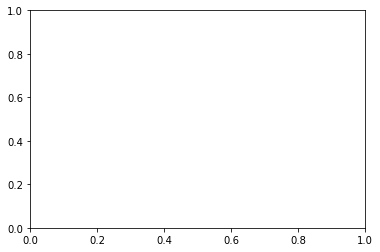

In [308]:
plt.plot(range(epochs),losses)

In [311]:
with torch.no_grad():
    
    y_val = model(cat_test,con_test)
    loss = torch.sqrt(criterion(y_val,y_test))

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 6])